# Desafio Python e SQL

### Nesse desafio, vamos fazer uma consulta em SQL com uma condição e fazer o tratamento das informações no Python usando o pandas

- Calcule o lucro diário da empresa 

- Tabela com as Vendas -> dbo.FactSales
- Lucro é -> Sales Amount - TotalCost - DiscountAmount
- Lembre que podemos ter mais de 1 transação por dia na tabela, então uma opção é usar o método groupby do pandas
- Sugestão para ajudar na análise é plotar um gráfico do lucro diário

In [1]:
import pyodbc

dados_conexao = ("Driver={SQL Server};"
                "Server=GAMER;"
                "Database=ContosoRetailDW;")

conexao = pyodbc.connect(dados_conexao)
print('Conexão Bem sucedida')

Conexão Bem sucedida


In [2]:
cursor = conexao.cursor()

In [3]:
import pandas as pd
vendas_df = pd.read_sql('SELECT * FROM ContosoRetailDW.dbo.FactSales', conexao)
display(vendas_df)

C:\Users\GAMERX\AppData\Local\Temp\ipykernel_16056\3200094520.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vendas_df = pd.read_sql('SELECT * FROM ContosoRetailDW.dbo.FactSales', conexao)


,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750,1,2010-01-01,2010-01-01
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000,1,2010-01-01,2010-01-01
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830,1,2010-01-01,2010-01-01
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750,1,2010-01-01,2010-01-01


In [15]:
print(vendas_df['DateKey'].max())
print(vendas_df['DateKey'].min())

vendas_df['Lucro'] = vendas_df['SalesAmount'] - vendas_df['TotalCost'] - vendas_df['DiscountAmount']

display(vendas_df)

2009-12-31 00:00:00
2007-01-01 00:00:00


,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate,Lucro
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01,776.40
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01,37.01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01,1685.73
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01,1133.20
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01,6476.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750,1,2010-01-01,2010-01-01,2.35
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000,1,2010-01-01,2010-01-01,8008.08
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830,1,2010-01-01,2010-01-01,518.32
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750,1,2010-01-01,2010-01-01,13123.08


In [29]:
vendas_diarias_df = vendas_df.groupby(['DateKey'])['Lucro'].sum().reset_index()
display(vendas_diarias_df)


,DateKey,Lucro
0,2007-01-01,4.446594e+06
1,2007-01-02,4.423362e+06
2,2007-01-03,4.515993e+06
3,2007-01-04,4.447113e+06
4,2007-01-05,4.338266e+06
...,...,...
1091,2009-12-27,5.438840e+06
1092,2009-12-28,5.273078e+06
1093,2009-12-29,5.523555e+06
1094,2009-12-30,5.399371e+06


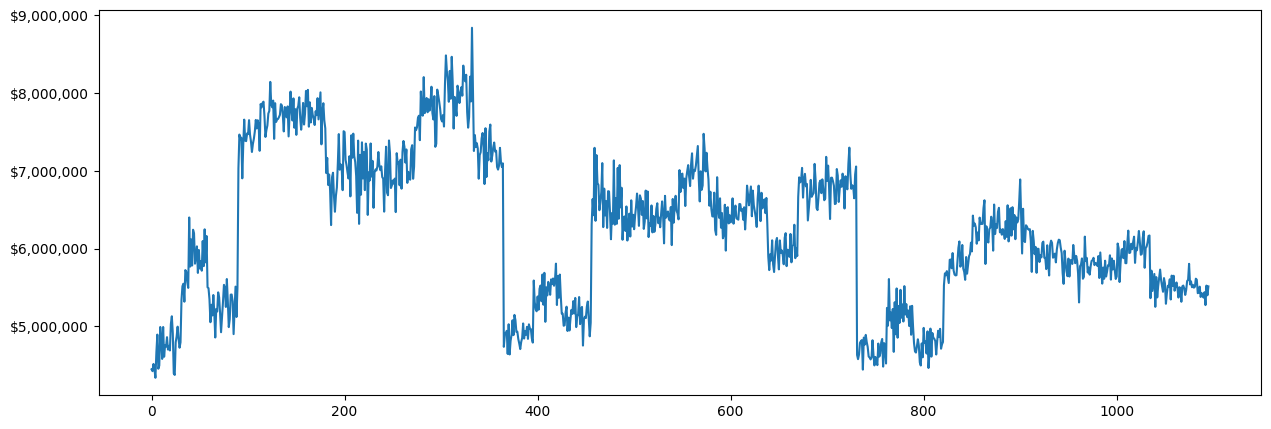

In [32]:
import matplotlib
import matplotlib.pyplot as plt

grafico = vendas_diarias_df['Lucro'].plot(figsize=(15, 5))
grafico.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()